In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [11]:
stars_df = pd.read_csv("Stars.csv")  # Loading the dataset from the same destination as the notebook

# Cleaning data as inconsistent cases and lettering
stars_df['Star color'] = stars_df['Star color'].str.lower()
stars_df['Star color'] = stars_df['Star color'].str.replace('-',' ')
stars_df['Star color'] = stars_df['Star color'].str.replace(' ','')
stars_df['Spectral Class'] = stars_df['Spectral Class'].str.lower()

stars_df.info()  # Getting data information on all the columns of the dataset 
stars_df.describe()  # getting numerical information for all columns of the dataset such as min-max values, mean, standard deviation, and percentiles

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [12]:
from statistics import mode

# printing the mode colour and spectral class for each type of star
for i in range(max(stars_df['Star type']) + 1):
    print("Star type: " + str(i) + ", mode colour: " + stars_df.loc[stars_df['Star type'] == i]['Star color'].mode()[0])
    
for i in range(max(stars_df['Star type']) + 1):
    print("Star type: " + str(i) + ", mode Spectral Class: " + stars_df.loc[stars_df['Star type'] == i]['Spectral Class'].mode()[0])


Star type: 0, mode colour: red
Star type: 1, mode colour: red
Star type: 2, mode colour: bluewhite
Star type: 3, mode colour: bluewhite
Star type: 4, mode colour: blue
Star type: 5, mode colour: red
Star type: 0, mode Spectral Class: m
Star type: 1, mode Spectral Class: m
Star type: 2, mode Spectral Class: b
Star type: 3, mode Spectral Class: b
Star type: 4, mode Spectral Class: o
Star type: 5, mode Spectral Class: m


In [13]:

# converting star colur and spectral class to numeric values so they can be fit by the model
stars_df['Star Color - numeric'] = pd.factorize(stars_df['Star color'])[0].tolist()
stars_df['Spectral Class - numeric'] = pd.factorize(stars_df['Spectral Class'])[0].tolist()

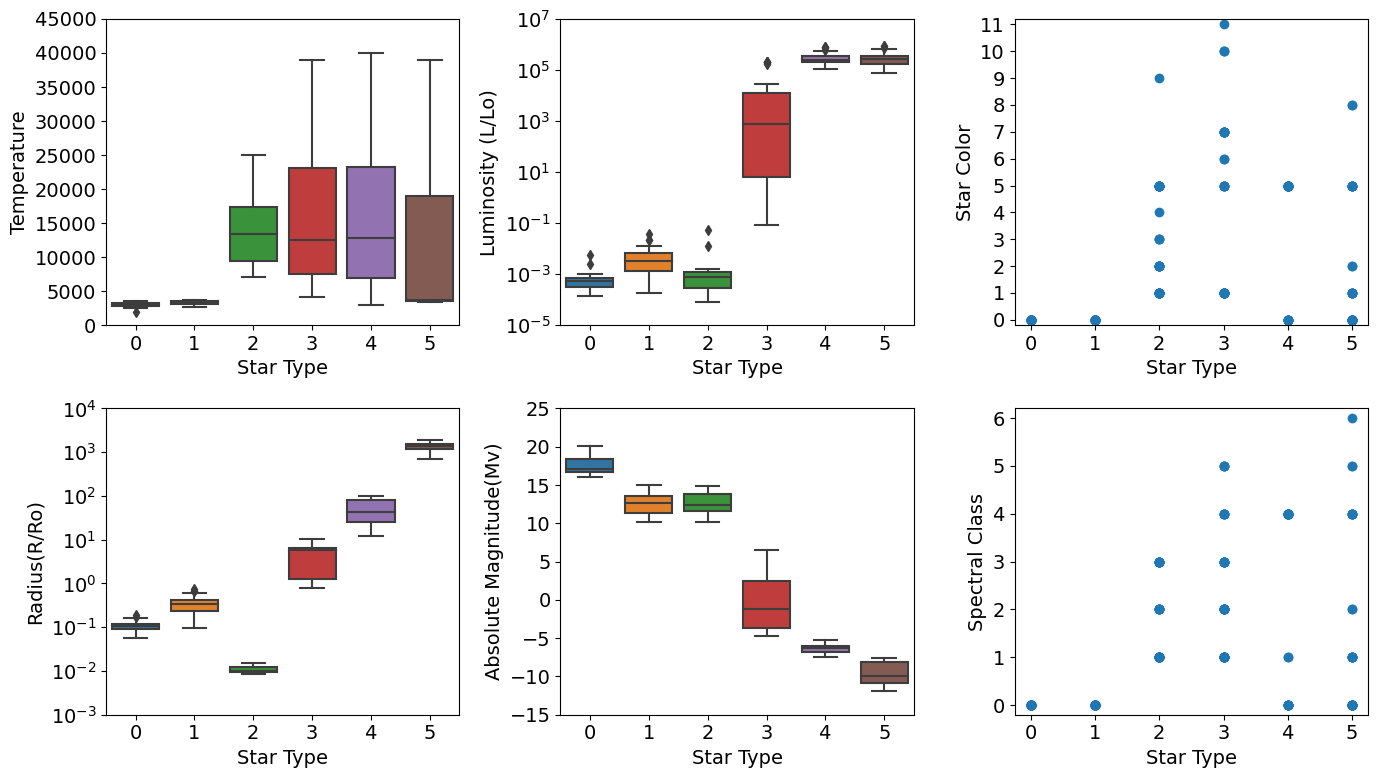

In [14]:
plt.rcParams.update({'font.size': 14})
fig, axes = plt.subplots(2, 3, figsize=(14, 8), dpi = 100, sharey = False)  # Set up a 2x2 grid of subplots with a shared y-axis 

# Box plots of temperature for each star type
sns.boxplot(ax = axes[0,0], x = stars_df['Star type'], y = stars_df['Temperature (K)'])
axes[0,0].set_xlabel('Star Type')
axes[0,0].set_ylabel('Temperature')
axes[0,0].set_yticks(np.arange(0, 50000, 5000))
axes[0,0].set_ylim((0, 45000))

# Box plots of Luminosity for each star type
sns.boxplot(ax = axes[0,1], x = stars_df['Star type'], y = stars_df['Luminosity(L/Lo)'])
axes[0,1].set_xlabel('Star Type')
axes[0,1].set_ylabel('Luminosity (L/Lo)')
axes[0,1].set_yscale("log")
axes[0,1].set_yticks([1e-5, 1e-3, 1e-1, 1e1, 1e3, 1e5, 1e7])
axes[0,1].set_ylim((1e-5, 1e7))

# Box plots of Radius for each star type
sns.boxplot(ax = axes[1,0], x = stars_df['Star type'], y = stars_df['Radius(R/Ro)'])
axes[1,0].set_xlabel('Star Type')
axes[1,0].set_ylabel('Radius(R/Ro)')
axes[1,0].set_yscale("log")
axes[1,0].set_yticks([1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4])
axes[1,0].set_ylim((1e-3, 1e4))
axes[1,0].minorticks_off()

# Box plots of Magnitude for each star type
sns.boxplot(ax = axes[1,1], x = stars_df['Star type'], y = stars_df['Absolute magnitude(Mv)'])
axes[1,1].set_xlabel('Star Type')
axes[1,1].set_ylabel('Absolute Magnitude(Mv)')
axes[1,1].set_yticks(np.arange(-15, 30, 5))
axes[1,1].set_ylim((-15, 25))

# Scatter plots of star colour for each star type
axes[0,2].scatter( stars_df['Star type'], stars_df['Star Color - numeric'])
axes[0,2].set_xlabel('Star Type')
axes[0,2].set_ylabel('Star Color')
axes[0,2].set_yticks(range(0,12))
axes[0,2].set_ylim((-0.2,11.2))

# Scatter plots of spectral class for each star type
axes[1,2].scatter(stars_df['Star type'], stars_df['Spectral Class - numeric'])
axes[1,2].set_xlabel('Star Type')
axes[1,2].set_ylabel('Spectral Class')
axes[1,2].set_yticks(range(0,7))
axes[1,2].set_ylim((-0.2, 6.2))

plt.tight_layout()


In [15]:
from sklearn.model_selection import train_test_split

# selecting features
feature_names = ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)', 'Star Color - numeric', 'Spectral Class - numeric']

# creating test train split
X_train, X_test, Y_train, Y_test = train_test_split(stars_df[feature_names], 
                                                    stars_df['Star type'],
                                                    random_state = 42)  


In [16]:
from sklearn.tree import DecisionTreeClassifier

# creating decision tree classifier model
stars_model = DecisionTreeClassifier(random_state = 42)

# training model
stars_model.fit(X_train, Y_train)


DecisionTreeClassifier(random_state=42)

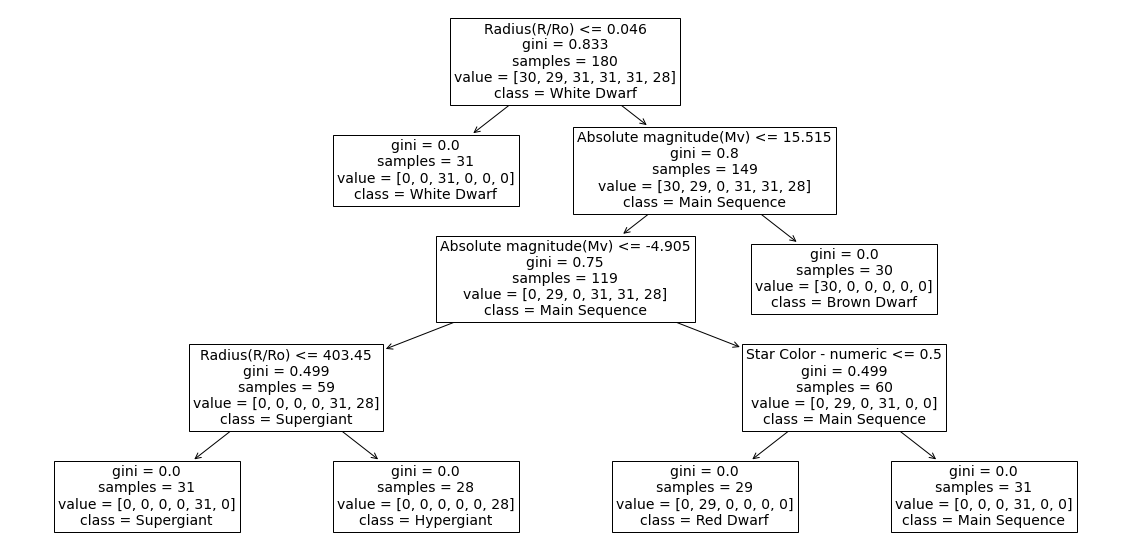

In [17]:
from sklearn import tree

# Visualising the decision tree
plt.figure(figsize=(20,10))

class_names = ['Brown Dwarf', 'Red Dwarf', 'White Dwarf', 'Main Sequence', 'Supergiant', 'Hypergiant']

tree.plot_tree(stars_model,
              feature_names = feature_names,
              class_names = class_names,
              fontsize = 14)
plt.show()


In [18]:
from sklearn.metrics import r2_score

# making predictions
stars_model_predictions = stars_model.predict(X_test)

# calculating r^2 score for predictions
model_r2 = r2_score(Y_test, stars_model_predictions)
print(model_r2)

print(Y_test.values, stars_model_predictions)

1.0
[2 0 3 4 4 5 5 2 0 2 4 2 5 4 5 5 0 1 3 0 0 1 5 3 5 3 1 2 5 3 3 4 2 0 1 0 1
 5 1 5 4 5 4 1 3 0 4 3 1 0 2 0 2 1 4 2 5 3 1 1] [2 0 3 4 4 5 5 2 0 2 4 2 5 4 5 5 0 1 3 0 0 1 5 3 5 3 1 2 5 3 3 4 2 0 1 0 1
 5 1 5 4 5 4 1 3 0 4 3 1 0 2 0 2 1 4 2 5 3 1 1]
